# Transforming DataFrame

## Inspecting a DataFrame

When you get a new DataFrame to work with, the first thing you need to do is explore it and see what it contains. There are several useful methods and attributes for this.

- **`.head()`**: Returns the first few rows (the “head” of the DataFrame).
- **`.info()`**: Shows information on each of the columns, such as the data type and number of missing values.
- **`.shape`**: Returns the number of rows and columns of the DataFrame.
- **`.describe()`**: Calculates a few summary statistics for each column.

`homelessness` is a DataFrame containing estimates of homelessness in each U.S. state in 2018. 

- The **`individual`** column is the number of homeless individuals not part of a family with children.  
- The **`family_members`** column is the number of homeless individuals part of a family with children.  
- The **`state_pop`** column is the state's total population.


In [4]:
import pandas as pd
homelessness = pd.read_csv('homelessness.csv')

# Print the head of the homelessness data
homelessness.head()

,region,state,individuals,family_members,state_pop
0,East South Central,Alabama,2570.0,864.0,4887681
1,Pacific,Alaska,1434.0,582.0,735139
2,Mountain,Arizona,7259.0,2606.0,7158024
3,West South Central,Arkansas,2280.0,432.0,3009733
4,Pacific,California,109008.0,20964.0,39461588


In [5]:
# Print information about homelessness
homelessness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   region          51 non-null     object 
 1   state           51 non-null     object 
 2   individuals     51 non-null     float64
 3   family_members  51 non-null     float64
 4   state_pop       51 non-null     int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 2.1+ KB


In [6]:
# Print the shape of homelessness
print(homelessness.shape)

(51, 5)


In [7]:
# Print a description of homelessness
print(homelessness.describe())

         individuals  family_members     state_pop
count      51.000000       51.000000  5.100000e+01
mean     7225.784314     3504.882353  6.405637e+06
std     15991.025083     7805.411811  7.327258e+06
min       434.000000       75.000000  5.776010e+05
25%      1446.500000      592.000000  1.777414e+06
50%      3082.000000     1482.000000  4.461153e+06
75%      6781.500000     3196.000000  7.340946e+06
max    109008.000000    52070.000000  3.946159e+07


>You can see that the average number of homeless individuals in each state is about 7226. Let's explore the DataFrame further.

## Parts of a DataFrame

To better understand **DataFrame** objects, it's useful to know that they consist of three components, stored as attributes:

- **`.values`**: A two-dimensional NumPy array of values.
- **`.columns`**: An index of columns: the column names.
- **`.index`**: An index for the rows: either row numbers or row names.

You can usually think of indexes as a list of strings or numbers, though the pandas `Index` data type allows for more sophisticated options (these will be covered later in the course).


In [10]:
# Print the values of homelessness
print(homelessness.values)

[['East South Central' 'Alabama' 2570.0 864.0 4887681]
 ['Pacific' 'Alaska' 1434.0 582.0 735139]
 ['Mountain' 'Arizona' 7259.0 2606.0 7158024]
 ['West South Central' 'Arkansas' 2280.0 432.0 3009733]
 ['Pacific' 'California' 109008.0 20964.0 39461588]
 ['Mountain' 'Colorado' 7607.0 3250.0 5691287]
 ['New England' 'Connecticut' 2280.0 1696.0 3571520]
 ['South Atlantic' 'Delaware' 708.0 374.0 965479]
 ['South Atlantic' 'District of Columbia' 3770.0 3134.0 701547]
 ['South Atlantic' 'Florida' 21443.0 9587.0 21244317]
 ['South Atlantic' 'Georgia' 6943.0 2556.0 10511131]
 ['Pacific' 'Hawaii' 4131.0 2399.0 1420593]
 ['Mountain' 'Idaho' 1297.0 715.0 1750536]
 ['East North Central' 'Illinois' 6752.0 3891.0 12723071]
 ['East North Central' 'Indiana' 3776.0 1482.0 6695497]
 ['West North Central' 'Iowa' 1711.0 1038.0 3148618]
 ['West North Central' 'Kansas' 1443.0 773.0 2911359]
 ['East South Central' 'Kentucky' 2735.0 953.0 4461153]
 ['West South Central' 'Louisiana' 2540.0 519.0 4659690]
 ['New 

In [11]:
# Print the column index of homelessness
print(homelessness.columns)

Index(['region', 'state', 'individuals', 'family_members', 'state_pop'], dtype='object')


In [12]:
# Print the row index of homelessness
print(homelessness.index)

RangeIndex(start=0, stop=51, step=1)


## Sorting rows

Finding interesting bits of data in a DataFrame is often easier if you change the order of the rows. You can sort the rows by passing a column name to `.sort_values()`.

In cases where rows have the same value (this is common if you sort on a categorical variable), you may wish to break the ties by sorting on another column. You can sort on multiple columns in this way by passing a list of column names.

In [14]:
# Sort homelessness by individuals
homelessness_ind = homelessness.sort_values("individuals")

# Print the top few rows
homelessness_ind.head()

,region,state,individuals,family_members,state_pop
50,Mountain,Wyoming,434.0,205.0,577601
34,West North Central,North Dakota,467.0,75.0,758080
7,South Atlantic,Delaware,708.0,374.0,965479
39,New England,Rhode Island,747.0,354.0,1058287
45,New England,Vermont,780.0,511.0,624358


In [15]:
# Sort homelessness by descending family members
homelessness_fam = homelessness.sort_values("family_members", ascending=False)

homelessness_fam.head()

,region,state,individuals,family_members,state_pop
32,Mid-Atlantic,New York,39827.0,52070.0,19530351
4,Pacific,California,109008.0,20964.0,39461588
21,New England,Massachusetts,6811.0,13257.0,6882635
9,South Atlantic,Florida,21443.0,9587.0,21244317
43,West South Central,Texas,19199.0,6111.0,28628666


In [16]:
# Sort homelessness by region, then descending family members
homelessness_reg_fam = homelessness.sort_values(['region', 'family_members'], ascending=[True, False])

# Print the top few rows
homelessness_reg_fam.head()

,region,state,individuals,family_members,state_pop
13,East North Central,Illinois,6752.0,3891.0,12723071
35,East North Central,Ohio,6929.0,3320.0,11676341
22,East North Central,Michigan,5209.0,3142.0,9984072
49,East North Central,Wisconsin,2740.0,2167.0,5807406
14,East North Central,Indiana,3776.0,1482.0,6695497


## Subsetting Columns

When working with data, you may not need all of the variables in your dataset. Square brackets (`[]`) can be used to select only the columns that matter to you in an order that makes sense to you.

To select only `"col_a"` of the DataFrame `df`, use:

```python
df["col_a"]

In [18]:
# Select the individuals column(series)
individuals = homelessness['individuals']

print(individuals.head())

0      2570.0
1      1434.0
2      7259.0
3      2280.0
4    109008.0
Name: individuals, dtype: float64


In [19]:
# Select the state and family_members columns(dataframe)
state_fam = homelessness[["state", "family_members"]]

state_fam.head()

,state,family_members
0,Alabama,864.0
1,Alaska,582.0
2,Arizona,2606.0
3,Arkansas,432.0
4,California,20964.0


In [20]:
# Select only the individuals and state columns, in that order
ind_state = homelessness[['individuals', 'state']]

ind_state.head()

,individuals,state
0,2570.0,Alabama
1,1434.0,Alaska
2,7259.0,Arizona
3,2280.0,Arkansas
4,109008.0,California


## Subsetting Rows

A large part of data science is about finding which bits of your dataset are interesting. One of the simplest techniques for this is to find a subset of rows that match some criteria. This is sometimes known as filtering rows or selecting rows.

There are many ways to subset a DataFrame. Perhaps the most common is to use relational operators to return `True` or `False` for each row, then pass that boolean Series inside square brackets.

In [22]:
# Filter for rows where individuals is greater than 10000
ind_gt_10k = homelessness[homelessness['individuals']>10000]

# See the result
ind_gt_10k

,region,state,individuals,family_members,state_pop
4,Pacific,California,109008.0,20964.0,39461588
9,South Atlantic,Florida,21443.0,9587.0,21244317
32,Mid-Atlantic,New York,39827.0,52070.0,19530351
37,Pacific,Oregon,11139.0,3337.0,4181886
43,West South Central,Texas,19199.0,6111.0,28628666
47,Pacific,Washington,16424.0,5880.0,7523869


In [23]:
# Filter for rows where region is Mountain
mountain_reg = homelessness[homelessness['region'] == 'Mountain']

# See the result
mountain_reg

,region,state,individuals,family_members,state_pop
2,Mountain,Arizona,7259.0,2606.0,7158024
5,Mountain,Colorado,7607.0,3250.0,5691287
12,Mountain,Idaho,1297.0,715.0,1750536
26,Mountain,Montana,983.0,422.0,1060665
28,Mountain,Nevada,7058.0,486.0,3027341
31,Mountain,New Mexico,1949.0,602.0,2092741
44,Mountain,Utah,1904.0,972.0,3153550
50,Mountain,Wyoming,434.0,205.0,577601


In [24]:
# Filter for rows where family_members is less than 1000 
# and region is Pacific
fam_lt_1k_pac = homelessness[(homelessness['family_members']<1000) & (homelessness['region'] == 'Pacific')]

# See the result
fam_lt_1k_pac

,region,state,individuals,family_members,state_pop
1,Pacific,Alaska,1434.0,582.0,735139


## Subsetting rows by categorical variables

Subsetting data based on a categorical variable often involves using the `or` operator (`|`) to select rows from multiple categories. This can get tedious when you want all states in one of three different regions, for example. Instead, use the `.isin()` method, which will allow you to tackle this problem by writing one condition instead of three separate ones.

**Example:**

Let's say you have a DataFrame called `df` with a column named 'Region'. You want to select all rows where the 'Region' is either 'North', 'South', or 'East'.

**Without `.isin()` (Less efficient):**

```python
subset_df = df[(df['Region'] == 'North') | (df['Region'] == 'South') | (df['Region'] == 'East')]

In [26]:
# The Mojave Desert states
canu = ["California", "Arizona", "Nevada", "Utah"]

# Filter for rows in the Mojave Desert states
mojave_homelessness = homelessness[homelessness["state"].isin(canu)]

# See the result
mojave_homelessness

,region,state,individuals,family_members,state_pop
2,Mountain,Arizona,7259.0,2606.0,7158024
4,Pacific,California,109008.0,20964.0,39461588
28,Mountain,Nevada,7058.0,486.0,3027341
44,Mountain,Utah,1904.0,972.0,3153550


## Adding New Columns

You aren't stuck with just the data you are given. Instead, you can add new columns to a DataFrame. This has many names, such as transforming, mutating, and feature engineering.

You can create new columns from scratch, but it is also common to derive them from other columns, for example, by adding columns together or by changing their units.

In [28]:
# Add total col as sum of individuals and family_members
homelessness['total'] = homelessness['individuals'] + homelessness['family_members']

# Add p_homeless col as proportion of total homeless population to the state population
homelessness['p_homeless'] = homelessness['total'] / homelessness['state_pop']

# See the result
homelessness.head()

,region,state,individuals,family_members,state_pop,total,p_homeless
0,East South Central,Alabama,2570.0,864.0,4887681,3434.0,0.000703
1,Pacific,Alaska,1434.0,582.0,735139,2016.0,0.002742
2,Mountain,Arizona,7259.0,2606.0,7158024,9865.0,0.001378
3,West South Central,Arkansas,2280.0,432.0,3009733,2712.0,0.000901
4,Pacific,California,109008.0,20964.0,39461588,129972.0,0.003294


## Combo-attack!
You've seen the four most common types of data manipulation: sorting rows, subsetting columns, subsetting rows, and adding new columns. In a real-life data analysis, you can mix and match these four manipulations to answer a multitude of questions.

In this exercise, you'll answer the question, "Which state has the highest number of homeless individuals per 10,000 people in the state?" Combine your new `pandas` skills to find out.

In [30]:
# Create indiv_per_10k col as homeless individuals per 10k state pop
homelessness["indiv_per_10k"] = 10000 * homelessness['individuals'] / homelessness['state_pop']

# Subset rows for indiv_per_10k greater than 20
high_homelessness = homelessness[homelessness['indiv_per_10k'] > 20]

# Sort high_homelessness by descending indiv_per_10k
high_homelessness_srt = high_homelessness.sort_values('indiv_per_10k', ascending = False)

# From high_homelessness_srt, select the state and indiv_per_10k cols
result = high_homelessness_srt[['state', 'indiv_per_10k']]

# See the result
result

,state,indiv_per_10k
8,District of Columbia,53.738381
11,Hawaii,29.079406
4,California,27.623825
37,Oregon,26.636307
28,Nevada,23.314189
47,Washington,21.829195
32,New York,20.392363


>District of Columbia has the highest number of homeless individuals - almost 54 per ten thousand people. This is almost double the number of the next-highest state, Hawaii. If you combine new column addition, row subsetting, sorting, and column selection, you can answer lots of questions like this.

# Aggregating DataFrame

## Mean and median
Summary statistics are exactly what they sound like - they summarize many numbers in one statistic. For example, mean, median, minimum, maximum, and standard deviation are summary statistics. Calculating summary statistics allows you to get a better sense of your data, even if there's a lot of it.

In [34]:
# Read in the csv file
sales = pd.read_csv('walmart.csv')

# Print the head of the sales DataFrame
sales.head()

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106
2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808
3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808
4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808


In [35]:
# Print the info about the sales DataFrame
print(sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10774 entries, 0 to 10773
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   store                 10774 non-null  int64  
 1   type                  10774 non-null  object 
 2   department            10774 non-null  int64  
 3   date                  10774 non-null  object 
 4   weekly_sales          10774 non-null  float64
 5   is_holiday            10774 non-null  bool   
 6   temperature_c         10774 non-null  float64
 7   fuel_price_usd_per_l  10774 non-null  float64
 8   unemployment          10774 non-null  float64
dtypes: bool(1), float64(4), int64(2), object(2)
memory usage: 684.0+ KB
None


In [36]:
# Print the mean of weekly_sales
print(sales['weekly_sales'].mean())

# Print the median of weekly_sales
print(sales['weekly_sales'].median())

23843.95014850566
12049.064999999999


>The mean weekly sales amount is almost double the median weekly sales amount! This can tell you that there are a few very high sales weeks that are making the mean so much higher than the median.

## Summarizing dates
Summary statistics can also be calculated on date columns that have values with the data type `datetime64`. Some summary statistics — like mean — don't make a ton of sense on dates, but others are super helpful, for example, minimum and maximum, which allow you to see what time range your data covers.

In [39]:
# Print the maximum of the date column
print(sales['date'].max())

# Print the minimum of the date column
print(sales['date'].min())

2012-10-26
2010-02-05


> Taking the minimum and maximum of a column of dates is handy for figuring out what time period your data covers. In this case, there are data from February of 2010 to October of 2012.

## Efficient summaries

While pandas and NumPy have tons of functions, sometimes, you may need a different function to summarize your data.

The `.agg()` method allows you to apply your own custom functions to a DataFrame, as well as apply functions to more than one column of a DataFrame at once, making your aggregations super-efficient. For example:


`df['column'].agg(function)`

In the custom function for this exercise, "IQR" is short for inter-quartile range, which is the 75th percentile minus the 25th percentile. It's an alternative to standard deviation that is helpful if your data contains outliers.

In [42]:
# A custom IQR function
def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)
    
# Print IQR of the temperature_c column
sales['temperature_c'].agg(iqr)

16.583333333333336

In [43]:
# A custom IQR function
def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)

# Update to print IQR of temperature_c, fuel_price_usd_per_l, & unemployment
print(sales[["temperature_c", "fuel_price_usd_per_l", "unemployment"]].agg(iqr))

temperature_c           16.583333
fuel_price_usd_per_l     0.073176
unemployment             0.565000
dtype: float64


In [44]:
import numpy as np
# Update to print IQR and median of temperature_c, fuel_price_usd_per_l, & unemployment
print(sales[["temperature_c", "fuel_price_usd_per_l", "unemployment"]].agg([iqr, "median"]))

        temperature_c  fuel_price_usd_per_l  unemployment
iqr         16.583333              0.073176         0.565
median      16.966667              0.743381         8.099


>The `.agg()` method makes it easy to compute multiple statistics on multiple columns, all in just one line of code.

## Cumulative statistics
Cumulative statistics can also be helpful in tracking summary statistics over time. In this exercise, you'll calculate the cumulative sum and cumulative max of a department's weekly sales, which will allow you to identify what the total sales were so far as well as what the highest weekly sales were so far.

In [47]:
sales.head()

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106
2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808
3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808
4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808


In [48]:
# The desired order of rows (indices)
row_order = [5, 0, 4, 9, 8, 7, 10, 3, 1, 6, 11, 2]

# Use .iloc to reorder the rows
sales_1_1 = sales.iloc[row_order]

# Display sales_1_1
sales_1_1

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
5,1,A,1,2010-07-02,16333.14,False,27.172222,0.705076,7.787
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808
9,1,A,1,2010-11-05,34238.88,False,14.855556,0.710359,7.838
8,1,A,1,2010-10-01,20094.19,False,22.161111,0.687640,7.838
7,1,A,1,2010-09-03,16241.78,False,27.338889,0.680772,7.787
10,1,A,1,2010-12-03,22517.56,False,9.594444,0.715378,7.838
3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808
1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106
6,1,A,1,2010-08-06,17508.41,False,30.644444,0.693980,7.787


In [49]:
# Sort sales_1_1 by date
sales_1_1 = sales_1_1.sort_values('date', ascending = True)

# Get the cumulative sum of weekly_sales, add as cum_weekly_sales col
sales_1_1['cum_weekly_sales'] = sales_1_1['weekly_sales'].cumsum()

# Get the cumulative max of weekly_sales, add as cum_max_sales col
sales_1_1['cum_max_sales'] = sales_1_1['weekly_sales'].cummax()

# See the columns you calculated
sales_1_1[["date", "weekly_sales", "cum_weekly_sales", "cum_max_sales"]]

,date,weekly_sales,cum_weekly_sales,cum_max_sales
0,2010-02-05,24924.50,24924.50,24924.50
1,2010-03-05,21827.90,46752.40,24924.50
2,2010-04-02,57258.43,104010.83,57258.43
3,2010-05-07,17413.94,121424.77,57258.43
4,2010-06-04,17558.09,138982.86,57258.43
5,2010-07-02,16333.14,155316.00,57258.43
6,2010-08-06,17508.41,172824.41,57258.43
7,2010-09-03,16241.78,189066.19,57258.43
8,2010-10-01,20094.19,209160.38,57258.43
9,2010-11-05,34238.88,243399.26,57258.43


> Not all functions that calculate on columns return a single number. Some, like the cumulative statistic functions, return a whole column.

## Dropping duplicates
Removing duplicates is an essential skill to get accurate counts because often, you don't want to count the same thing multiple times. In this exercise, you'll create some new DataFrames using unique values from sales.

In [52]:
# Drop duplicate store/type combinations
store_types = sales.drop_duplicates(subset = ['store', 'type'])
store_types.head()

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
901,2,A,1,2010-02-05,35034.06,False,4.550000,0.679451,8.324
1798,4,A,1,2010-02-05,38724.42,False,6.533333,0.686319,8.623
2699,6,A,1,2010-02-05,25619.00,False,4.683333,0.679451,7.259
3593,10,B,1,2010-02-05,40212.84,False,12.411111,0.782478,9.765


In [53]:
# Drop duplicate store/department combinations
store_depts = sales.drop_duplicates(subset = ['store', 'department'])
store_depts.head()

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
12,1,A,2,2010-02-05,50605.27,False,5.727778,0.679451,8.106
24,1,A,3,2010-02-05,13740.12,False,5.727778,0.679451,8.106
36,1,A,4,2010-02-05,39954.04,False,5.727778,0.679451,8.106
48,1,A,5,2010-02-05,32229.38,False,5.727778,0.679451,8.106


In [54]:
# Subset the rows where is_holiday is True and drop duplicate dates
holiday_dates = sales[sales['is_holiday'] == True].drop_duplicates('date')

# Print date col of holiday_dates
holiday_dates['date']

498     2010-09-10
691     2011-11-25
2315    2010-02-12
6735    2012-09-07
6810    2010-12-31
6815    2012-02-10
6820    2011-09-09
Name: date, dtype: object

>The holiday weeks correspond to the Superbowl in February, Labor Day in September, Thanksgiving in November, and Christmas in December. Now that the duplicates are removed, it's time to do some counting.

## Counting categorical variables
Counting is a great way to get an overview of your data and to spot curiosities that you might not notice otherwise. In this exercise, you'll count the number of each type of store and the number of each department number using the DataFrames you created in the previous exercise:

In [57]:
# Count the number of stores of each type
store_counts = store_types['type'].value_counts()
print(store_counts)

type
A    11
B     1
Name: count, dtype: int64


In [58]:
# Get the proportion of stores of each type
store_props = store_types['type'].value_counts(normalize=True)
print(store_props)

type
A    0.916667
B    0.083333
Name: proportion, dtype: float64


In [59]:
# Count the number of stores for each department and sort
dept_counts_sorted = store_depts['department'].value_counts(sort=True)
print(dept_counts_sorted)

department
1     12
55    12
72    12
71    12
67    12
      ..
37    10
48     8
50     6
39     4
43     2
Name: count, Length: 80, dtype: int64


In [60]:
# Get the proportion of stores in each department and sort
dept_props_sorted = store_depts['department'].value_counts(sort=True, normalize=True)
print(dept_props_sorted)

department
1     0.012917
55    0.012917
72    0.012917
71    0.012917
67    0.012917
        ...   
37    0.010764
48    0.008611
50    0.006459
39    0.004306
43    0.002153
Name: proportion, Length: 80, dtype: float64


>It looks like department 43 only exists in two stores.

## What percent of sales occurred at each store type?
While `.groupby()` is useful, you can calculate grouped summary statistics without it.

Walmart distinguishes three types of stores: "supercenters," "discount stores," and "neighborhood markets," encoded in this dataset as type "A," "B," and "C." In this exercise, you'll calculate the total sales made at each store type, without using `.groupby()`. You can then use these numbers to see what proportion of Walmart's total sales were made at each type.

In [63]:
# Calc total weekly sales
sales_all = sales["weekly_sales"].sum()

# Subset for type A stores, calc total weekly sales
sales_A = sales[sales["type"] == "A"]["weekly_sales"].sum()

# Subset for type B stores, calc total weekly sales
sales_B = sales[sales["type"] == "B"]["weekly_sales"].sum()

# Subset for type C stores, calc total weekly sales
sales_C = sales[sales["type"] == "C"]["weekly_sales"].sum()

# Get proportion for each type
sales_propn_by_type = [sales_A, sales_B, sales_C] / sales_all
print(sales_propn_by_type)

[0.9097747 0.0902253 0.       ]


>About 91% of sales occurred in stores of type A', 9% in stores of type B, and there are no sales records for stores of type C. Now see if you can do this calculation using `.groupby()`

## Calculations with .groupby()
The `.groupby()` method makes life much easier. In this exercise, you'll perform the same calculations as last time, except you'll use the `.groupby()` method. You'll also perform calculations on data grouped by two variables to see if sales differ by store type depending on if it's a holiday week or not

In [66]:
# Group by type; calc total weekly sales
sales_by_type = sales.groupby("type")["weekly_sales"].sum()

# Get proportion for each type
sales_propn_by_type = sales_by_type / sum(sales_by_type)
print(sales_propn_by_type)

type
A    0.909775
B    0.090225
Name: weekly_sales, dtype: float64


In [67]:
# Group by type and is_holiday; calc total weekly sales
sales_by_type_is_holiday = sales.groupby(['type', 'is_holiday'])['weekly_sales'].sum()
print(sales_by_type_is_holiday)

type  is_holiday
A     False         2.336927e+08
      True          2.360181e+04
B     False         2.317678e+07
      True          1.621410e+03
Name: weekly_sales, dtype: float64


## Multiple grouped summaries

Earlier in this chapter, you saw that the `.agg()` method is useful to compute multiple statistics on multiple variables. It also works with grouped data. NumPy, which is imported as `np`, has many different summary statistics functions, including: `np.min`, `np.max`, `np.mean`, and `np.median`.

In [69]:
# For each store type, aggregate weekly_sales: get min, max, mean, and median
sales_stats = sales.groupby('type')['weekly_sales'].agg(["min", "max", "mean", "median"])

# Print sales_stats
sales_stats

,min,max,mean,median
type,,,,
A,-1098.0,293966.05,23674.667242,11943.92
B,-798.0,232558.51,25696.678370,13336.08


In [70]:
# For each store type, aggregate unemployment and fuel_price_usd_per_l: get min, max, mean, and median
unemp_fuel_stats = sales.groupby('type')[['unemployment', 'fuel_price_usd_per_l']].agg(["min", "max", "mean", "median"])

# Print unemp_fuel_stats
unemp_fuel_stats

unemployment                         fuel_price_usd_per_l            \
              min    max      mean median                  min       max   
type                                                                       
A           3.879  8.992  7.972611  8.067             0.664129  1.107410   
B           7.170  9.765  9.279323  9.199             0.760023  1.107674   

                          
          mean    median  
type                      
A     0.744619  0.735455  
B     0.805858  0.803348

> Notice that the minimum weekly_sales is negative because some stores had more returns than sales.

## Pivoting on one variable
Pivot tables are the standard way of aggregating data in spreadsheets.

In pandas, pivot tables are essentially another way of performing grouped calculations. That is, the `.pivot_table()` method is an alternative to `.groupby()`.

In this exercise, you'll perform calculations using .pivot_table() to replicate the calculations you performed in the last lesson using `.groupby()`.

In [73]:
# Pivot for mean weekly_sales for each store type
mean_sales_by_type = sales.pivot_table(values='weekly_sales', index='type')

# Print mean_sales_by_type
print(mean_sales_by_type)

      weekly_sales
type              
A     23674.667242
B     25696.678370


In [74]:
# Pivot for mean and median weekly_sales for each store type
mean_med_sales_by_type = sales.pivot_table(values='weekly_sales', index='type', aggfunc=["mean", "median"])

# Print mean_med_sales_by_type
mean_med_sales_by_type

,mean,median
,weekly_sales,weekly_sales
type,,
A,23674.667242,11943.92
B,25696.678370,13336.08


In [75]:
# Pivot for mean weekly_sales by store type and holiday 
mean_sales_by_type_holiday = sales.pivot_table(values='weekly_sales', index='type', columns='is_holiday')

# Print mean_sales_by_type_holiday
print(mean_sales_by_type_holiday)

is_holiday         False      True 
type                               
A           23768.583523  590.04525
B           25751.980533  810.70500


## Fill in missing values and sum values with pivot tables

The `.pivot_table()` method has several useful arguments, including `fill_value` and `margins`.

*   `fill_value` replaces missing values with a real value (known as imputation). What to replace missing values with is a topic big enough to have its own course (Dealing with Missing Data in Python), but the simplest thing to do is to substitute a dummy value.

*   `margins` is a shortcut for when you pivoted by two variables, but also wanted to pivot by each of those variables separately: it gives the row and column totals of the pivot table contents.

In this exercise, you'll practice using these arguments to up your pivot table skills, which will help you crunch numbers more efficiently!

In [77]:
# Print mean weekly_sales by department and type; fill missing values with 0
sales.pivot_table(values='weekly_sales', index='department', columns='type', fill_value = 0)

type,A,B
department,,
1,30961.725379,44050.626667
2,67600.158788,112958.526667
3,17160.002955,30580.655000
4,44285.399091,51219.654167
5,34821.011364,63236.875000
...,...,...
95,123933.787121,77082.102500
96,21367.042857,9528.538333
97,28471.266970,5828.873333


In [78]:
# Print the mean weekly_sales by department and type; fill missing values with 0s; sum all rows and cols
sales.pivot_table(values="weekly_sales", index="department", columns="type", fill_value=0, margins=True)

type,A,B,All
department,,,
1,30961.725379,44050.626667,32052.467153
2,67600.158788,112958.526667,71380.022778
3,17160.002955,30580.655000,18278.390625
4,44285.399091,51219.654167,44863.253681
5,34821.011364,63236.875000,37189.000000
...,...,...,...
96,21367.042857,9528.538333,20337.607681
97,28471.266970,5828.873333,26584.400833
98,12875.423182,217.428333,11820.590278


>You are now armed with pivot table skills that can help you compute summaries at multiple grouped levels in one line of code. Note the subtlety in the value of margins here. The column 'All' returns an overall mean for each department, not `(A+B)/2`. `(A+B)/2` would be a mean of means, rather than an overall mean per department!

# Slicing and Indexing DataFrames

## Setting and removing indexes
pandas allows you to designate columns as an index. This enables cleaner code when taking subsets (as well as providing more efficient lookup under some circumstances).

In this chapter, you'll be exploring temperatures, a DataFrame of average `temperatures` in cities around the world.

In [82]:
temperatures = pd.read_csv('temperatures.csv')

In [83]:
# Look at temperatures
temperatures.head()

,date,city,country,avg_temp_c
0,2000-01-01,Abidjan,Côte D'Ivoire,27.293
1,2000-02-01,Abidjan,Côte D'Ivoire,27.685
2,2000-03-01,Abidjan,Côte D'Ivoire,29.061
3,2000-04-01,Abidjan,Côte D'Ivoire,28.162
4,2000-05-01,Abidjan,Côte D'Ivoire,27.547


In [84]:
# Set the index of temperatures to city
temperatures_ind = temperatures.set_index('city')

# Look at temperatures_ind
temperatures_ind.head()

,date,country,avg_temp_c
city,,,
Abidjan,2000-01-01,Côte D'Ivoire,27.293
Abidjan,2000-02-01,Côte D'Ivoire,27.685
Abidjan,2000-03-01,Côte D'Ivoire,29.061
Abidjan,2000-04-01,Côte D'Ivoire,28.162
Abidjan,2000-05-01,Côte D'Ivoire,27.547


In [85]:
# Reset the temperatures_ind index, keeping its contents
temperatures_ind.reset_index().head()

,city,date,country,avg_temp_c
0,Abidjan,2000-01-01,Côte D'Ivoire,27.293
1,Abidjan,2000-02-01,Côte D'Ivoire,27.685
2,Abidjan,2000-03-01,Côte D'Ivoire,29.061
3,Abidjan,2000-04-01,Côte D'Ivoire,28.162
4,Abidjan,2000-05-01,Côte D'Ivoire,27.547


In [86]:
# Reset the temperatures_ind index, dropping its contents
temperatures_ind.reset_index(drop=True).head()

,date,country,avg_temp_c
0,2000-01-01,Côte D'Ivoire,27.293
1,2000-02-01,Côte D'Ivoire,27.685
2,2000-03-01,Côte D'Ivoire,29.061
3,2000-04-01,Côte D'Ivoire,28.162
4,2000-05-01,Côte D'Ivoire,27.547


## Subsetting with .loc[]
The killer feature for indexes is `.loc[]`: a subsetting method that accepts index values. When you pass it a single argument, it will take a subset of rows.

The code for subsetting using `.loc[]` can be easier to read than standard square bracket subsetting, which can make your code less burdensome to maintain.

In [88]:
# Make a list of cities to subset on
cities = ["Moscow", "Saint Petersburg"]

# Subset temperatures using square brackets
temperatures[temperatures["city"].isin(cities)].head()

,date,city,country,avg_temp_c
10725,2000-01-01,Moscow,Russia,-7.313
10726,2000-02-01,Moscow,Russia,-3.551
10727,2000-03-01,Moscow,Russia,-1.661
10728,2000-04-01,Moscow,Russia,10.096
10729,2000-05-01,Moscow,Russia,10.357


In [89]:
# Subset temperatures_ind using .loc[]
temperatures_ind.loc[cities].head()

,date,country,avg_temp_c
city,,,
Moscow,2000-01-01,Russia,-7.313
Moscow,2000-02-01,Russia,-3.551
Moscow,2000-03-01,Russia,-1.661
Moscow,2000-04-01,Russia,10.096
Moscow,2000-05-01,Russia,10.357


## Setting multi-level indexes
Indexes can also be made out of multiple columns, forming a ***multi-level index*** (sometimes called a ***hierarchical index***). There is a trade-off to using these.

The benefit is that multi-level indexes make it more natural to reason about nested categorical variables. For example, in a clinical trial, you might have control and treatment groups. Then each test subject belongs to one or another group, and we can say that a test subject is nested inside the treatment group. Similarly, in the temperature dataset, the city is located in the country, so we can say a city is nested inside the country.

The main downside is that the code for manipulating indexes is different from the code for manipulating columns, so you have to learn two syntaxes and keep track of how your data is represented.

In [91]:
# Index temperatures by country & city
temperatures_ind = temperatures.set_index(["country", "city"])
temperatures_ind

date  avg_temp_c
country       city                           
Côte D'Ivoire Abidjan  2000-01-01      27.293
              Abidjan  2000-02-01      27.685
              Abidjan  2000-03-01      29.061
              Abidjan  2000-04-01      28.162
              Abidjan  2000-05-01      27.547
...                           ...         ...
China         Xian     2013-05-01      18.979
              Xian     2013-06-01      23.522
              Xian     2013-07-01      25.251
              Xian     2013-08-01      24.528
              Xian     2013-09-01         NaN

[16500 rows x 2 columns]

In [92]:
# List of tuples: Brazil, Rio De Janeiro & Pakistan, Lahore
rows_to_keep = [("Brazil", "Rio De Janeiro"), ("Pakistan", "Lahore")]

# Subset for rows to keep
temperatures_ind.loc[rows_to_keep]

date  avg_temp_c
country  city                                  
Brazil   Rio De Janeiro  2000-01-01      25.974
         Rio De Janeiro  2000-02-01      26.699
         Rio De Janeiro  2000-03-01      26.270
         Rio De Janeiro  2000-04-01      25.750
         Rio De Janeiro  2000-05-01      24.356
...                             ...         ...
Pakistan Lahore          2013-05-01      33.457
         Lahore          2013-06-01      34.456
         Lahore          2013-07-01      33.279
         Lahore          2013-08-01      31.511
         Lahore          2013-09-01         NaN

[330 rows x 2 columns]

## Sorting by Index Values

Previously, you changed the order of the rows in a DataFrame by calling `.sort_values()`. It's also useful to be able to sort by elements in the index. For this, you need to use `.sort_index()`.

`pandas` is loaded as `pd`. `temperatures_ind` has a multi-level index of country and city, and is available.

In [153]:
# Sort temperatures_ind by index values (both country and city in ascending order)
temperatures_ind.sort_index()

date  avg_temp_c
country     city                          
Afghanistan Kabul   2000-01-01       3.326
            Kabul   2000-02-01       3.454
            Kabul   2000-03-01       9.612
            Kabul   2000-04-01      17.925
            Kabul   2000-05-01      24.658
...                        ...         ...
Zimbabwe    Harare  2013-05-01      18.298
            Harare  2013-06-01      17.020
            Harare  2013-07-01      16.299
            Harare  2013-08-01      19.232
            Harare  2013-09-01         NaN

[16500 rows x 2 columns]

In [155]:
# Sort temperatures_ind by index values at the city level only (within each country)
print(temperatures_ind.sort_index(level="city"))

                             date  avg_temp_c
country       city                           
Côte D'Ivoire Abidjan  2000-01-01      27.293
              Abidjan  2000-02-01      27.685
              Abidjan  2000-03-01      29.061
              Abidjan  2000-04-01      28.162
              Abidjan  2000-05-01      27.547
...                           ...         ...
China         Xian     2013-05-01      18.979
              Xian     2013-06-01      23.522
              Xian     2013-07-01      25.251
              Xian     2013-08-01      24.528
              Xian     2013-09-01         NaN

[16500 rows x 2 columns]


In [157]:
# Sort temperatures_ind by country (ascending) then city (descending)
print(temperatures_ind.sort_index(level=["country", "city"], ascending=[True, False]))

                          date  avg_temp_c
country     city                          
Afghanistan Kabul   2000-01-01       3.326
            Kabul   2000-02-01       3.454
            Kabul   2000-03-01       9.612
            Kabul   2000-04-01      17.925
            Kabul   2000-05-01      24.658
...                        ...         ...
Zimbabwe    Harare  2013-05-01      18.298
            Harare  2013-06-01      17.020
            Harare  2013-07-01      16.299
            Harare  2013-08-01      19.232
            Harare  2013-09-01         NaN

[16500 rows x 2 columns]


## Slicing index values

Slicing lets you select consecutive elements of an object using `first:last` syntax. DataFrames can be sliced by index values or by row/column number; we'll start with the first case. This involves slicing inside the `.loc[]` method.

Compared to slicing lists, there are a few things to remember.

*   You can only slice an index if the index is sorted (using `.sort_index()`).
*   To slice at the outer level, `first` and `last` can be strings.
*   To slice at inner levels, `first` and `last` should be tuples.
*   If you pass a single slice to `.loc[]`, it will slice the rows.


In [160]:
# Sort the index of temperatures_ind
temperatures_srt = temperatures_ind.sort_index()

# Subset rows from Pakistan to Russia(outer level)
print(temperatures_srt.loc['Pakistan':'Russia'])

                                 date  avg_temp_c
country  city                                    
Pakistan Faisalabad        2000-01-01      12.792
         Faisalabad        2000-02-01      14.339
         Faisalabad        2000-03-01      20.309
         Faisalabad        2000-04-01      29.072
         Faisalabad        2000-05-01      34.845
...                               ...         ...
Russia   Saint Petersburg  2013-05-01      12.355
         Saint Petersburg  2013-06-01      17.185
         Saint Petersburg  2013-07-01      17.234
         Saint Petersburg  2013-08-01      17.153
         Saint Petersburg  2013-09-01         NaN

[1155 rows x 2 columns]


In [164]:
# Try to subset rows from Lahore to Moscow(outer level)
print(temperatures_srt.loc['Lahore':'Moscow'])

                          date  avg_temp_c
country city                              
Mexico  Mexico      2000-01-01      12.694
        Mexico      2000-02-01      14.677
        Mexico      2000-03-01      17.376
        Mexico      2000-04-01      18.294
        Mexico      2000-05-01      18.562
...                        ...         ...
Morocco Casablanca  2013-05-01      19.217
        Casablanca  2013-06-01      23.649
        Casablanca  2013-07-01      27.488
        Casablanca  2013-08-01      27.952
        Casablanca  2013-09-01         NaN

[330 rows x 2 columns]


In [166]:
# Subset rows from Pakistan, Lahore to Russia, Moscow(inner level)
print(temperatures_srt.loc[('Pakistan', 'Lahore'):('Russia', 'Moscow')])

                       date  avg_temp_c
country  city                          
Pakistan Lahore  2000-01-01      12.792
         Lahore  2000-02-01      14.339
         Lahore  2000-03-01      20.309
         Lahore  2000-04-01      29.072
         Lahore  2000-05-01      34.845
...                     ...         ...
Russia   Moscow  2013-05-01      16.152
         Moscow  2013-06-01      18.718
         Moscow  2013-07-01      18.136
         Moscow  2013-08-01      17.485
         Moscow  2013-09-01         NaN

[660 rows x 2 columns]


## Slicing in Both Directions

You've seen slicing DataFrames by rows and by columns, but since DataFrames are two-dimensional objects, it is often natural to slice both dimensions at once. That is, by passing two arguments to `.loc[]`, you can subset by rows and columns in one go.

`pandas` is loaded as `pd`.  `temperatures_srt` is indexed by country and city, has a sorted index, and is available.

In [169]:
# Subset rows from India, Hyderabad to Iraq, Baghdad
print(temperatures_srt.loc[("India", "Hyderabad"):("Iraq", "Baghdad")])

                         date  avg_temp_c
country city                             
India   Hyderabad  2000-01-01      23.779
        Hyderabad  2000-02-01      25.826
        Hyderabad  2000-03-01      28.821
        Hyderabad  2000-04-01      32.698
        Hyderabad  2000-05-01      32.438
...                       ...         ...
Iraq    Baghdad    2013-05-01      28.673
        Baghdad    2013-06-01      33.803
        Baghdad    2013-07-01      36.392
        Baghdad    2013-08-01      35.463
        Baghdad    2013-09-01         NaN

[2145 rows x 2 columns]


In [171]:
# Subset in both directions at once
print(temperatures_srt.loc[:, "date":"avg_temp_c"])

                          date  avg_temp_c
country     city                          
Afghanistan Kabul   2000-01-01       3.326
            Kabul   2000-02-01       3.454
            Kabul   2000-03-01       9.612
            Kabul   2000-04-01      17.925
            Kabul   2000-05-01      24.658
...                        ...         ...
Zimbabwe    Harare  2013-05-01      18.298
            Harare  2013-06-01      17.020
            Harare  2013-07-01      16.299
            Harare  2013-08-01      19.232
            Harare  2013-09-01         NaN

[16500 rows x 2 columns]


In [173]:
# Subset in both directions at once
print(temperatures_srt.loc[("India", "Hyderabad"):("Iraq", "Baghdad"), "date":"avg_temp_c"])

                         date  avg_temp_c
country city                             
India   Hyderabad  2000-01-01      23.779
        Hyderabad  2000-02-01      25.826
        Hyderabad  2000-03-01      28.821
        Hyderabad  2000-04-01      32.698
        Hyderabad  2000-05-01      32.438
...                       ...         ...
Iraq    Baghdad    2013-05-01      28.673
        Baghdad    2013-06-01      33.803
        Baghdad    2013-07-01      36.392
        Baghdad    2013-08-01      35.463
        Baghdad    2013-09-01         NaN

[2145 rows x 2 columns]


## Slicing Time Series

Slicing is particularly useful for time series since it's a common task to filter data within a specific date range.  To effectively slice your time series data, it's recommended to set the date column as the index of your DataFrame.  You can then use the `.loc[]` accessor to perform the subsetting.

**Key point:**  Always maintain your dates in ISO 8601 format for consistent and predictable slicing.  This format includes:

*   `"yyyy-mm-dd"` for year-month-day (e.g., "2023-10-27")
*   `"yyyy-mm"` for year-month (e.g., "2023-10")
*   `"yyyy"` for year (e.g., "2023")

**Combining Boolean Conditions:**

As you learned in Chapter 1, you can combine multiple Boolean conditions using logical operators like `&` (AND).  When doing this in a single line of code, remember to enclose each condition in parentheses `()`.  This ensures the correct order of operations.

**Example (Conceptual):**

```python
# Assuming 'df' is your DataFrame and 'date' is your index
# Slice for data between '2023-01-01' and '2023-01-15'
subset_df = df.loc['2023-01-01':'2023-01-15']

# Slice for data in the year 2022
year_2022_df = df.loc['2022']

# Slice with combined conditions (example):
# Data from January 2023 where a 'value' column is greater than 10
# Requires date to be your index
combined_df = df.loc[(df.index >= '2023-01-01') & (df.index <= '2023-01-31') & (df['value'] > 10)]


In [177]:
# Use Boolean conditions to subset temperatures for rows in 2010 and 2011
temperatures_bool = temperatures[(temperatures['date'] >= "2010-01-01") & (temperatures['date'] <= "2011-12-31")]
print(temperatures_bool)

             date     city        country  avg_temp_c
120    2010-01-01  Abidjan  Côte D'Ivoire      28.270
121    2010-02-01  Abidjan  Côte D'Ivoire      29.262
122    2010-03-01  Abidjan  Côte D'Ivoire      29.596
123    2010-04-01  Abidjan  Côte D'Ivoire      29.068
124    2010-05-01  Abidjan  Côte D'Ivoire      28.258
...           ...      ...            ...         ...
16474  2011-08-01     Xian          China      23.069
16475  2011-09-01     Xian          China      16.775
16476  2011-10-01     Xian          China      12.587
16477  2011-11-01     Xian          China       7.543
16478  2011-12-01     Xian          China      -0.490

[2400 rows x 4 columns]


In [179]:
# Set date as the index and sort the index
temperatures_ind = temperatures.set_index('date').sort_index()

In [181]:
# Use .loc[] to subset temperatures_ind for rows in 2010 and 2011
print(temperatures_ind.loc["2010":"2011"])

                  city    country  avg_temp_c
date                                         
2010-01-01  Faisalabad   Pakistan      11.810
2010-01-01   Melbourne  Australia      20.016
2010-01-01   Chongqing      China       7.921
2010-01-01   São Paulo     Brazil      23.738
2010-01-01   Guangzhou      China      14.136
...                ...        ...         ...
2010-12-01     Jakarta  Indonesia      26.602
2010-12-01       Gizeh      Egypt      16.530
2010-12-01      Nagpur      India      19.120
2010-12-01      Sydney  Australia      19.559
2010-12-01    Salvador     Brazil      26.265

[1200 rows x 3 columns]


In [183]:
# Use .loc[] to subset temperatures_ind for rows from Aug 2010 to Feb 2011
print(temperatures_ind.loc["2010-08":"2011-02"])

                     city        country  avg_temp_c
date                                                
2010-08-01       Calcutta          India      30.226
2010-08-01           Pune          India      24.941
2010-08-01          Izmir         Turkey      28.352
2010-08-01        Tianjin          China      25.543
2010-08-01         Manila    Philippines      27.101
...                   ...            ...         ...
2011-01-01  Dar Es Salaam       Tanzania      28.541
2011-01-01        Nairobi          Kenya      17.768
2011-01-01    Addis Abeba       Ethiopia      17.708
2011-01-01        Nanjing          China       0.144
2011-01-01       New York  United States      -4.463

[600 rows x 3 columns]


## Subsetting by Row/Column Number

The most common ways to subset rows are the ways we've previously discussed: using a Boolean condition or by index labels. However, it is also occasionally useful to pass row numbers.

This is done using `.iloc[]`, and like `.loc[]`, it can take two arguments to let you subset by rows and columns.

In [190]:
# Get 23rd row, 2nd column (index 22, 1)
temperatures.iloc[22, 1]

'Abidjan'

In [192]:
# Use slicing to get the first 5 rows
temperatures.iloc[0:5]

,date,city,country,avg_temp_c
0,2000-01-01,Abidjan,Côte D'Ivoire,27.293
1,2000-02-01,Abidjan,Côte D'Ivoire,27.685
2,2000-03-01,Abidjan,Côte D'Ivoire,29.061
3,2000-04-01,Abidjan,Côte D'Ivoire,28.162
4,2000-05-01,Abidjan,Côte D'Ivoire,27.547


In [194]:
# Use slicing to get columns 3 to 4
temperatures.iloc[:, 2:4]

,country,avg_temp_c
0,Côte D'Ivoire,27.293
1,Côte D'Ivoire,27.685
2,Côte D'Ivoire,29.061
3,Côte D'Ivoire,28.162
4,Côte D'Ivoire,27.547
...,...,...
16495,China,18.979
16496,China,23.522
16497,China,25.251
16498,China,24.528


In [196]:
# Use slicing in both directions at once
temperatures.iloc[0:5, 2:4]

,country,avg_temp_c
0,Côte D'Ivoire,27.293
1,Côte D'Ivoire,27.685
2,Côte D'Ivoire,29.061
3,Côte D'Ivoire,28.162
4,Côte D'Ivoire,27.547


## Pivot temperature by city and year

It's interesting to see how temperatures for each city change over time—looking at every month results in a big table, which can be tricky to reason about. Instead, let's look at how temperatures change by year.

You can access the components of a date (year, month and day) using code of the form `dataframe["column"].dt.component`. For example, the month component is `dataframe["column"].dt.month`, and the year component is `dataframe["column"].dt.year`.

Once you have the year column, you can create a pivot table with the data aggregated by city and year, which you'll explore in the coming exercises.

In [201]:
temperatures.head()

,date,city,country,avg_temp_c
0,2000-01-01,Abidjan,Côte D'Ivoire,27.293
1,2000-02-01,Abidjan,Côte D'Ivoire,27.685
2,2000-03-01,Abidjan,Côte D'Ivoire,29.061
3,2000-04-01,Abidjan,Côte D'Ivoire,28.162
4,2000-05-01,Abidjan,Côte D'Ivoire,27.547


In [203]:
temperatures.dtypes

date           object
city           object
country        object
avg_temp_c    float64
dtype: object

In [207]:
temperatures['date'] = pd.to_datetime(temperatures['date'])

In [213]:
# Add a year column to temperatures
temperatures['year'] = temperatures['date'].dt.year

# Pivot avg_temp_c by country and city vs year
temp_by_country_city_vs_year = temperatures.pivot_table(values='avg_temp_c', index = ['country', 'city'], columns='year')

# See the result
temp_by_country_city_vs_year.head(10)

year                             2000       2001       2002       2003  \
country     city                                                         
Afghanistan Kabul           15.822667  15.847917  15.714583  15.132583   
Angola      Luanda          24.410333  24.427083  24.790917  24.867167   
Australia   Melbourne       14.320083  14.180000  14.075833  13.985583   
            Sydney          17.567417  17.854500  17.733833  17.592333   
Bangladesh  Dhaka           25.905250  25.931250  26.095000  25.927417   
Brazil      Belo Horizonte  21.694917  22.141500  22.497333  22.078917   
            Brasília        22.456167  22.565333  23.175500  22.749000   
            Fortaleza       27.495167  27.692833  27.853083  27.862833   
            Rio De Janeiro  24.363083  24.989083  25.176667  24.896000   
            Salvador        25.351667  25.592917  25.560500  25.675750   

year                             2004       2005       2006       2007  \
country     city                                                         
Afghanistan Kabul           16.128417  14.847500  15.798500  15.518000   
Angola      Luanda          24.216167  24.414583  24.138417  24.241583   
Australia   Melbourne       13.742083  14.378500  13.991083  14.991833   
            Sydney          17.869667  18.028083  17.749500  18.020833   
Bangladesh  Dhaka           26.136083  26.193333  26.440417  25.951333   
Brazil      Belo Horizonte  21.588583  22.054667  21.817917  22.189333   
            Brasília        22.606583  22.736750  22.349167  22.998000   
            Fortaleza       27.721083  28.171000  27.759917  27.920083   
            Rio De Janeiro  24.238250  24.792917  24.571917  24.775083   
            Salvador        25.365833  25.697083  25.409500  25.438417   

year                             2008       2009       2010       2011  \
country     city                                                         
Afghanistan Kabul           15.479250  15.093333  15.676000  15.812167   
Angola      Luanda          24.266333  24.325083  24.440250  24.150750   
Australia   Melbourne       14.110583  14.647417  14.231667  14.190917   
            Sydney          17.321083  18.175833  17.999000  17.713333   
Bangladesh  Dhaka           26.004500  26.535583  26.648167  25.803250   
Brazil      Belo Horizonte  21.857917  22.248750  22.116333  21.740500   
            Brasília        22.595333  22.663000  23.035167  22.387167   
            Fortaleza       27.536250  27.385417  28.179167  27.363167   
            Rio De Janeiro  24.260333  24.983583  24.952750  24.319833   
            Salvador        25.543750  25.999750  25.776917  25.283667   

year                             2012       2013  
country     city                                  
Afghanistan Kabul           14.510333  16.206125  
Angola      Luanda          24.240083  24.553875  
Australia   Melbourne       14.268667  14.741500  
            Sydney          17.474333  18.089750  
Bangladesh  Dhaka           26.283583  26.587000  
Brazil      Belo Horizonte  22.161500  21.586125  
            Brasília        22.843583  22.601375  
            Fortaleza       28.208917  27.705625  
            Rio De Janeiro  24.838417  25.188000  
            Salvador        25.648333  26.138000

## Subsetting Pivot Tables

A pivot table is essentially a DataFrame with sorted indexes.  Therefore, the techniques you've already learned for subsetting DataFrames can be directly applied to pivot tables. A particularly useful method is combining `.loc[]` with slicing.

In [216]:
# Subset for Egypt to India
temp_by_country_city_vs_year.loc['Egypt':'India']

# Subset for Egypt, Cairo to India, Delhi
temp_by_country_city_vs_year.loc[('Egypt', 'Cairo'):('India', 'Delhi')]

# Subset for Egypt, Cairo to India, Delhi, and 2005 to 2010
temp_by_country_city_vs_year.loc[('Egypt', 'Cairo'):('India', 'Delhi'),
                                  '2005':'2010']

year                       2005       2006       2007       2008       2009  \
country  city                                                                 
Egypt    Cairo        22.006500  22.050000  22.361000  22.644500  22.625000   
         Gizeh        22.006500  22.050000  22.361000  22.644500  22.625000   
Ethiopia Addis Abeba  18.312833  18.427083  18.142583  18.165000  18.765333   
France   Paris        11.552917  11.788500  11.750833  11.278250  11.464083   
Germany  Berlin        9.919083  10.545333  10.883167  10.657750  10.062500   
India    Ahmadabad    26.828083  27.282833  27.511167  27.048500  28.095833   
         Bangalore    25.476500  25.418250  25.464333  25.352583  25.725750   
         Bombay       27.035750  27.381500  27.634667  27.177750  27.844500   
         Calcutta     26.729167  26.986250  26.584583  26.522333  27.153250   
         Delhi        25.716083  26.365917  26.145667  25.675000  26.554250   

year                       2010  
country  city                    
Egypt    Cairo        23.718250  
         Gizeh        23.718250  
Ethiopia Addis Abeba  18.298250  
France   Paris        10.409833  
Germany  Berlin        8.606833  
India    Ahmadabad    28.017833  
         Bangalore    25.705250  
         Bombay       27.765417  
         Calcutta     27.288833  
         Delhi        26.520250

## Calculating on a Pivot Table

Pivot tables are filled with summary statistics, but they are only a first step to finding something insightful. Often you'll need to perform further calculations on them. A common thing to do is to find the rows or columns where the highest or lowest value occurs.

Recall from Chapter 1 that you can easily subset a Series or DataFrame to find rows of interest using a logical condition inside of square brackets. For example: `series[series > value]`.

In [223]:
# Get the worldwide mean temp by year
mean_temp_by_year = temp_by_country_city_vs_year.mean()
mean_temp_by_year

year
2000    19.506243
2001    19.679352
2002    19.855685
2003    19.630197
2004    19.672204
2005    19.607239
2006    19.793993
2007    19.854270
2008    19.608778
2009    19.833752
2010    19.911734
2011    19.549197
2012    19.668239
2013    20.312285
dtype: float64

In [225]:
# Filter for the year that had the highest mean temp
print(mean_temp_by_year[mean_temp_by_year == mean_temp_by_year.max()])

year
2013    20.312285
dtype: float64


In [229]:
# Get the mean temp by city
mean_temp_by_city = temp_by_country_city_vs_year.mean(axis=1)
mean_temp_by_city

country        city            
Afghanistan    Kabul               15.541955
Angola         Luanda              24.391616
Australia      Melbourne           14.275411
               Sydney              17.799250
Bangladesh     Dhaka               26.174440
                                     ...    
United States  Chicago             11.330825
               Los Angeles         16.675399
               New York            10.911034
Vietnam        Ho Chi Minh City    27.922857
Zimbabwe       Harare              20.699000
Length: 100, dtype: float64

In [231]:
# Filter for the city that had the lowest mean temp
print(mean_temp_by_city[mean_temp_by_city == mean_temp_by_city.min()])

country  city  
China    Harbin    4.876551
dtype: float64


# Creating and Visualizing DataFrames

## Which avocado size is most popular?

Avocados are increasingly popular and delicious in guacamole and on toast. The Hass Avocado Board keeps track of avocado supply and demand across the USA, including the sales of three different sizes of avocado. In this exercise, you'll use a bar plot to figure out which size is the most popular.

Bar plots are great for revealing relationships between categorical (size) and numeric (number sold) variables, but you'll often have to manipulate your data first in order to get the numbers you need for plotting.

In [237]:
avocados = pd.read_csv('avocado.csv')
avocados.head()

,date,type,year,avg_price,size,nb_sold
0,2015-12-27,conventional,2015,0.95,small,9626901.09
1,2015-12-20,conventional,2015,0.98,small,8710021.76
2,2015-12-13,conventional,2015,0.93,small,9855053.66
3,2015-12-06,conventional,2015,0.89,small,9405464.36
4,2015-11-29,conventional,2015,0.99,small,8094803.56


         date          type  year  avg_price   size     nb_sold
0  2015-12-27  conventional  2015       0.95  small  9626901.09
1  2015-12-20  conventional  2015       0.98  small  8710021.76
2  2015-12-13  conventional  2015       0.93  small  9855053.66
3  2015-12-06  conventional  2015       0.89  small  9405464.36
4  2015-11-29  conventional  2015       0.99  small  8094803.56


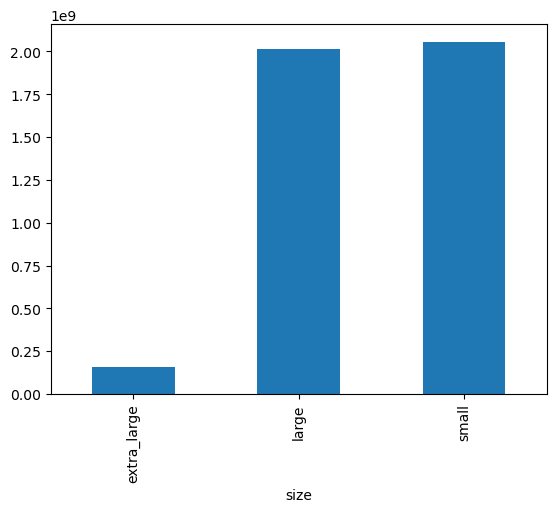

In [243]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Look at the first few rows of data
print(avocados.head())

# Get the total number of avocados sold of each size
nb_sold_by_size = avocados.groupby('size')['nb_sold'].sum()

# Create a bar plot of the number of avocados sold by size
nb_sold_by_size.plot(kind='bar')

# Show the plot
plt.show()

## Changes in sales over time
Line plots are designed to visualize the relationship between two numeric variables, where each data values is connected to the next one. They are especially useful for visualizing the change in a number over time since each time point is naturally connected to the next time point. In this exercise, you'll visualize the change in avocado sales over three years.

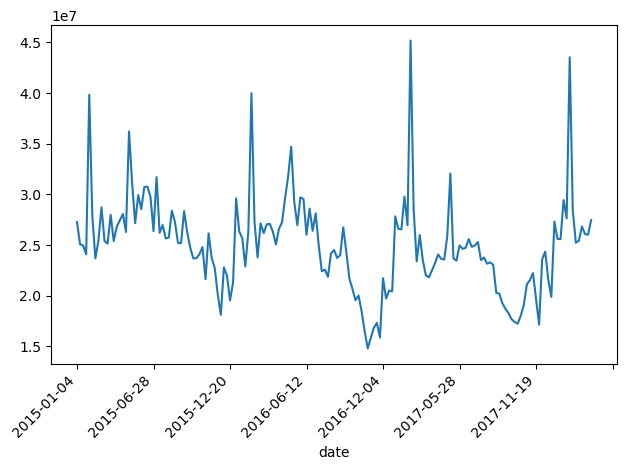

In [256]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Get the total number of avocados sold on each date
nb_sold_by_date = avocados.groupby('date')['nb_sold'].sum()

# Create a line plot of the number of avocados sold by date
nb_sold_by_date.plot(kind='line', )

# Rotate the x-axis labels
plt.xticks(rotation=45, ha='right')

# Adjust the layout
plt.tight_layout() 

# Show the plot
plt.show()

> It looks like the number of avocados spikes around the same time each year.

## Avocado supply and demand
Scatter plots are ideal for visualizing relationships between numerical variables. In this exercise, you'll compare the number of avocados sold to average price and see if they're at all related. If they're related, you may be able to use one number to predict the other.

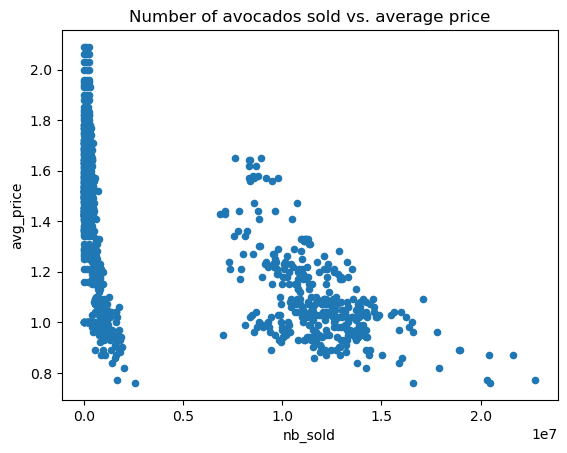

In [264]:
# Scatter plot of avg_price vs. nb_sold with title
avocados.plot(x='nb_sold', y='avg_price', title='Number of avocados sold vs. average price', kind='scatter')

# Show the plot
plt.show()

>It looks like when more avocados are sold, prices go down. However, this doesn't mean that fewer sales causes higher prices - we can only tell that they're correlated with each other.

## Price of conventional vs. organic avocados
Creating multiple plots for different subsets of data allows you to compare groups. In this exercise, you'll create multiple histograms to compare the prices of conventional and organic avocados.

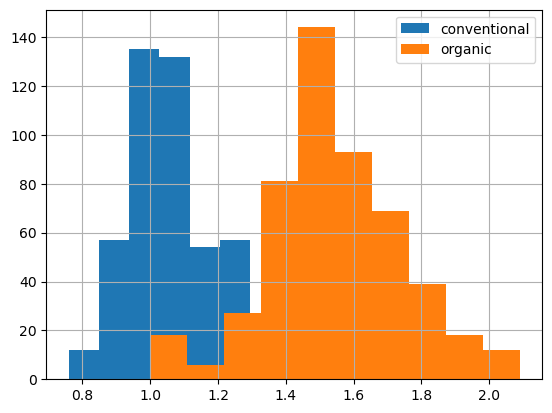

In [268]:
# Histogram of conventional avg_price 
avocados[avocados['type'] == 'conventional']['avg_price'].hist()

# Histogram of organic avg_price
avocados[avocados['type'] == 'organic']['avg_price'].hist()

# Add a legend
plt.legend(['conventional', 'organic'])

# Show the plot
plt.show()

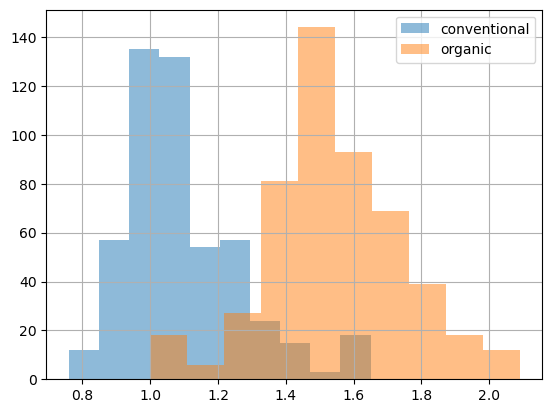

In [270]:
# Modify histogram transparency to 0.5 
avocados[avocados["type"] == "conventional"]["avg_price"].hist(alpha=0.5)

# Modify histogram transparency to 0.5
avocados[avocados["type"] == "organic"]["avg_price"].hist(alpha=0.5)

# Add a legend
plt.legend(["conventional", "organic"])

# Show the plot
plt.show()

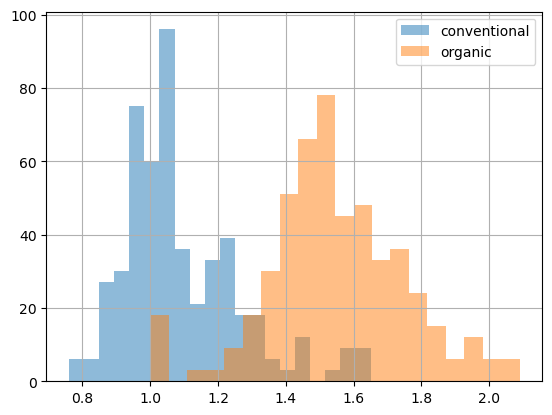

In [272]:
# Modify bins to 20
avocados[avocados["type"] == "conventional"]["avg_price"].hist(alpha=0.5, bins=20)

# Modify bins to 20
avocados[avocados["type"] == "organic"]["avg_price"].hist(alpha=0.5, bins=20)

# Add a legend
plt.legend(["conventional", "organic"])

# Show the plot
plt.show()

>We can see that on average, organic avocados are more expensive than conventional ones, but their price distributions have some overlap.

## Finding missing values
Missing values are everywhere, and you don't want them interfering with your work. Some functions ignore missing data by default, but that's not always the behavior you might want. Some functions can't handle missing values at all, so these values need to be taken care of before you can use them. If you don't know where your missing values are, or if they exist, you could make mistakes in your analysis. In this exercise, you'll determine if there are missing values in the dataset, and if so, how many.

In [311]:
avocados_2016 = pd.read_csv('avocado_2016.csv')
avocados_2016.head()

,date,avg_price,total_sold,small_sold,large_sold,xl_sold,total_bags_sold,small_bags_sold,large_bags_sold,xl_bags_sold
0,2016-12-25,1.00,30287853.70,9255125.20,10282925.61,541972.42,10207830.47,7709584.33,2417144.92,81101.22
1,2016-12-18,0.96,29583882.61,9394065.91,10339168.20,427872.42,9422776.08,6970320.34,2358443.96,94011.78
2,2016-12-11,0.98,30093540.70,9009996.11,NaN,403047.93,10713276.64,8149438.75,2490495.07,73342.82
3,2016-12-04,1.00,31621221.90,11043350.90,9908982.97,428009.84,10240878.19,7187022.58,2988504.98,65350.63
4,2016-11-27,1.21,22923062.65,7891487.94,7337341.77,NaN,7349757.04,5691266.56,1609867.20,48623.28


In [358]:
avocados_2016.head().style.background_gradient(cmap='viridis')

,date,avg_price,total_sold,small_sold,large_sold,xl_sold,total_bags_sold,small_bags_sold,large_bags_sold,xl_bags_sold
0,2016-12-25,1.000000,30287853.700000,9255125.200000,10282925.610000,541972.420000,10207830.470000,7709584.330000,2417144.920000,81101.220000
1,2016-12-18,0.960000,29583882.610000,9394065.910000,10339168.200000,427872.420000,9422776.080000,6970320.340000,2358443.960000,94011.780000
2,2016-12-11,0.980000,30093540.700000,9009996.110000,nan,403047.930000,10713276.640000,8149438.750000,2490495.070000,73342.820000
3,2016-12-04,1.000000,31621221.900000,11043350.900000,9908982.970000,428009.840000,10240878.190000,7187022.580000,2988504.980000,65350.630000
4,2016-11-27,1.210000,22923062.650000,7891487.940000,7337341.770000,nan,7349757.040000,5691266.560000,1609867.200000,48623.280000


In [380]:
avocados_2016.style.highlight_max(color='green').highlight_min(color='red')

,date,avg_price,total_sold,small_sold,large_sold,xl_sold,total_bags_sold,small_bags_sold,large_bags_sold,xl_bags_sold
0,2016-12-25,1.000000,30287853.700000,9255125.200000,10282925.610000,541972.420000,10207830.470000,7709584.330000,2417144.920000,81101.220000
1,2016-12-18,0.960000,29583882.610000,9394065.910000,10339168.200000,427872.420000,9422776.080000,6970320.340000,2358443.960000,94011.780000
2,2016-12-11,0.980000,30093540.700000,9009996.110000,nan,403047.930000,10713276.640000,8149438.750000,2490495.070000,73342.820000
3,2016-12-04,1.000000,31621221.900000,11043350.900000,9908982.970000,428009.840000,10240878.190000,7187022.580000,2988504.980000,65350.630000
4,2016-11-27,1.210000,22923062.650000,7891487.940000,7337341.770000,nan,7349757.040000,5691266.560000,1609867.200000,48623.280000
5,2016-11-20,1.270000,24989702.750000,nan,8033510.820000,407567.780000,8017463.630000,6207080.460000,1765673.770000,44709.400000
6,2016-11-13,1.360000,24075126.490000,8235135.430000,7759608.210000,477520.950000,7602861.900000,5602593.660000,1957163.930000,43104.310000
7,2016-11-06,1.440000,22534698.380000,7804252.910000,nan,505349.440000,7098159.720000,5245066.660000,1812174.320000,40918.740000
8,2016-10-30,1.430000,21009730.210000,7100458.820000,6852046.350000,453145.260000,6604079.780000,4655045.620000,1882750.650000,66283.510000
9,2016-10-23,1.340000,24753513.950000,7579629.060000,8104522.260000,452383.960000,8616978.670000,6508666.810000,2016513.030000,91798.830000


In [382]:
avocados_2016.style \
    .highlight_max(color='green') \
    .highlight_min(color='red') \
    .highlight_null(color='orange')

,date,avg_price,total_sold,small_sold,large_sold,xl_sold,total_bags_sold,small_bags_sold,large_bags_sold,xl_bags_sold
0,2016-12-25,1.000000,30287853.700000,9255125.200000,10282925.610000,541972.420000,10207830.470000,7709584.330000,2417144.920000,81101.220000
1,2016-12-18,0.960000,29583882.610000,9394065.910000,10339168.200000,427872.420000,9422776.080000,6970320.340000,2358443.960000,94011.780000
2,2016-12-11,0.980000,30093540.700000,9009996.110000,nan,403047.930000,10713276.640000,8149438.750000,2490495.070000,73342.820000
3,2016-12-04,1.000000,31621221.900000,11043350.900000,9908982.970000,428009.840000,10240878.190000,7187022.580000,2988504.980000,65350.630000
4,2016-11-27,1.210000,22923062.650000,7891487.940000,7337341.770000,nan,7349757.040000,5691266.560000,1609867.200000,48623.280000
5,2016-11-20,1.270000,24989702.750000,nan,8033510.820000,407567.780000,8017463.630000,6207080.460000,1765673.770000,44709.400000
6,2016-11-13,1.360000,24075126.490000,8235135.430000,7759608.210000,477520.950000,7602861.900000,5602593.660000,1957163.930000,43104.310000
7,2016-11-06,1.440000,22534698.380000,7804252.910000,nan,505349.440000,7098159.720000,5245066.660000,1812174.320000,40918.740000
8,2016-10-30,1.430000,21009730.210000,7100458.820000,6852046.350000,453145.260000,6604079.780000,4655045.620000,1882750.650000,66283.510000
9,2016-10-23,1.340000,24753513.950000,7579629.060000,8104522.260000,452383.960000,8616978.670000,6508666.810000,2016513.030000,91798.830000


In [315]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Check individual values for missing values
print(avocados_2016.isna())

     date  avg_price  total_sold  small_sold  large_sold  xl_sold  \
0   False      False       False       False       False    False   
1   False      False       False       False       False    False   
2   False      False       False       False        True    False   
3   False      False       False       False       False    False   
4   False      False       False       False       False     True   
5   False      False       False        True       False    False   
6   False      False       False       False       False    False   
7   False      False       False       False        True    False   
8   False      False       False       False       False    False   
9   False      False       False       False       False    False   
10  False      False       False       False        True    False   
11  False      False       False       False       False    False   
12  False      False       False       False       False    False   
13  False      False       False  

In [317]:
# Check each column for missing values
print(avocados_2016.isna().any())

date               False
avg_price          False
total_sold         False
small_sold          True
large_sold          True
xl_sold             True
total_bags_sold    False
small_bags_sold    False
large_bags_sold    False
xl_bags_sold       False
dtype: bool


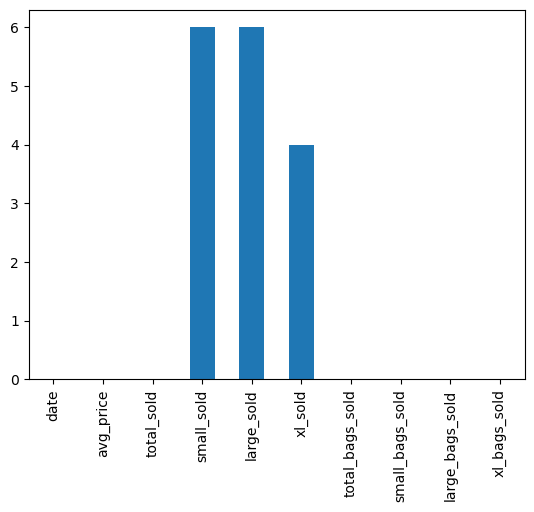

In [319]:
# Bar plot of missing values by variable
avocados_2016.isna().sum().plot(kind='bar')

# Show plot
plt.show()

>It looks like there are missing values in the small_sold, large_sold, and xl_sold columns.

## Removing missing values
Now that you know there are some missing values in your DataFrame, you have a few options to deal with them. One way is to remove them from the dataset completely. In this exercise, you'll remove missing values by removing all rows that contain missing values.

In [323]:
# Remove rows with missing values
avocados_complete = avocados_2016.dropna()

# Check if any columns contain missing values
print(avocados_complete.isna().any())

date               False
avg_price          False
total_sold         False
small_sold         False
large_sold         False
xl_sold            False
total_bags_sold    False
small_bags_sold    False
large_bags_sold    False
xl_bags_sold       False
dtype: bool


>Removing observations with missing values is a quick and dirty way to deal with missing data, but this can introduce bias to your data if the values are not missing at random.

## Replacing missing values
Another way of handling missing values is to replace them all with the same value. For numerical variables, one option is to replace values with 0— you'll do this here. However, when you replace missing values, you make assumptions about what a missing value means. In this case, you will assume that a missing number sold means that no sales for that avocado type were made that week.

In this exercise, you'll see how replacing missing values can affect the distribution of a variable using histograms. 

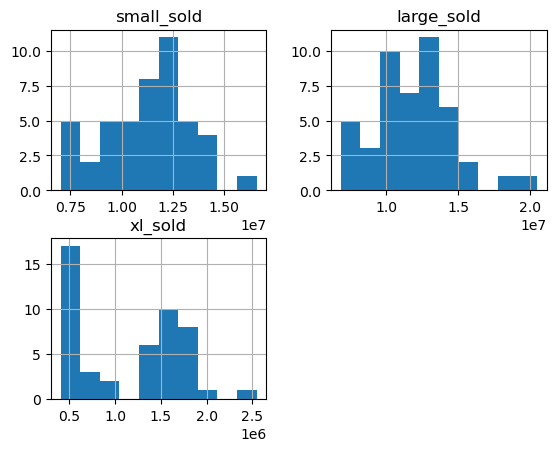

In [328]:
# List the columns with missing values
cols_with_missing = ["small_sold", "large_sold", "xl_sold"]

# Create histograms showing the distributions cols_with_missing
avocados_2016[cols_with_missing].hist()

# Show the plot
plt.show()

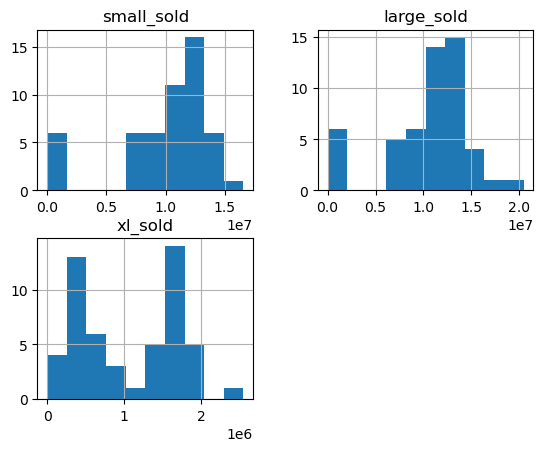

In [332]:
# Fill in missing values with 0
avocados_filled = avocados_2016[cols_with_missing].fillna(0)

# Create histograms of the filled columns
avocados_filled[cols_with_missing].hist()

# Show the plot
plt.show()

>Notice how the distribution has changed shape after replacing missing values with zeros.

## List of dictionaries
You recently got some new avocado data from 2019 that you'd like to put in a DataFrame using the list of dictionaries method. Remember that with this method, you go through the data row by row.

In [346]:
# Create a list of dictionaries with new data
avocados_list = [
    {"date": "2019-11-03", "small_sold": 10376832, "large_sold": 7835071},
    {"date": "2019-11-10", "small_sold": 10717154, "large_sold": 8561348},
]

# Convert list into DataFrame
avocados_2019 = pd.DataFrame(avocados_list)

# Print the new DataFrame
avocados_2019.style.background_gradient(cmap='viridis')

,date,small_sold,large_sold
0,2019-11-03,10376832,7835071
1,2019-11-10,10717154,8561348


## Dictionary of lists
Some more data just came in! This time, you'll use the dictionary of lists method, parsing the data column by column.

In [344]:
# Create a dictionary of lists with new data
avocados_dict = {
  "date": ["2019-11-17", "2019-12-01"],
  "small_sold": [10859987, 9291631],
  "large_sold": [7674135, 6238096]
}

# Convert dictionary into DataFrame
avocados_2019 = pd.DataFrame(avocados_dict)

# Print the new DataFrame
avocados_2019.style.background_gradient(cmap='viridis')

,date,small_sold,large_sold
0,2019-11-17,10859987,7674135
1,2019-12-01,9291631,6238096


## CSV to DataFrame
You work for an airline, and your manager has asked you to do a competitive analysis and see how often passengers flying on other airlines are involuntarily bumped from their flights. You got a CSV file (`airline_bumping.csv`) from the Department of Transportation containing data on passengers that were involuntarily denied boarding in 2016 and 2017, but it doesn't have the exact numbers you want. In order to figure this out, you'll need to get the CSV into a pandas DataFrame and do some manipulation!

In [388]:
# Read CSV as DataFrame called airline_bumping
airline_bumping = pd.read_csv("airline_bumping.csv")

# Take a look at the DataFrame
print(airline_bumping.head())

             airline  year  nb_bumped  total_passengers
0    DELTA AIR LINES  2017        679          99796155
1     VIRGIN AMERICA  2017        165           6090029
2    JETBLUE AIRWAYS  2017       1475          27255038
3    UNITED AIRLINES  2017       2067          70030765
4  HAWAIIAN AIRLINES  2017         92           8422734


In [396]:
# For each airline, select nb_bumped and total_passengers and sum
airline_totals = airline_bumping.groupby('airline')[['nb_bumped', 'total_passengers']].sum()
airline_totals.style.highlight_max(color='green').highlight_min(color='red')

,nb_bumped,total_passengers
airline,,
ALASKA AIRLINES,1392,36543121
AMERICAN AIRLINES,11115,197365225
DELTA AIR LINES,1591,197033215
EXPRESSJET AIRLINES,3326,27858678
FRONTIER AIRLINES,1228,22954995
HAWAIIAN AIRLINES,122,16577572
JETBLUE AIRWAYS,3615,53245866
SKYWEST AIRLINES,3094,47091737
SOUTHWEST AIRLINES,18585,228142036


In [398]:
# Create new col, bumps_per_10k: no. of bumps per 10k passengers for each airline
airline_totals["bumps_per_10k"] = airline_totals["nb_bumped"] / airline_totals["total_passengers"] * 10000

In [402]:
# Print airline_totals
airline_totals

,nb_bumped,total_passengers,bumps_per_10k
airline,,,
ALASKA AIRLINES,1392,36543121,0.380920
AMERICAN AIRLINES,11115,197365225,0.563169
DELTA AIR LINES,1591,197033215,0.080748
EXPRESSJET AIRLINES,3326,27858678,1.193883
FRONTIER AIRLINES,1228,22954995,0.534960
HAWAIIAN AIRLINES,122,16577572,0.073593
JETBLUE AIRWAYS,3615,53245866,0.678926
SKYWEST AIRLINES,3094,47091737,0.657015
SOUTHWEST AIRLINES,18585,228142036,0.814624


## DataFrame to CSV
You're almost there! To make things easier to read, you'll need to sort the data and export it to CSV so that your colleagues can read it.

In [405]:
# Create airline_totals_sorted
airline_totals_sorted = airline_totals.sort_values('bumps_per_10k', ascending=False)

# Print airline_totals_sorted
print(airline_totals_sorted)

# Save as airline_totals_sorted.csv
airline_totals_sorted.to_csv("airline_totals_sorted.csv")

                     nb_bumped  total_passengers  bumps_per_10k
airline                                                        
EXPRESSJET AIRLINES       3326          27858678       1.193883
SPIRIT AIRLINES           2920          32304571       0.903897
SOUTHWEST AIRLINES       18585         228142036       0.814624
JETBLUE AIRWAYS           3615          53245866       0.678926
SKYWEST AIRLINES          3094          47091737       0.657015
AMERICAN AIRLINES        11115         197365225       0.563169
FRONTIER AIRLINES         1228          22954995       0.534960
ALASKA AIRLINES           1392          36543121       0.380920
UNITED AIRLINES           4941         134468897       0.367446
VIRGIN AMERICA             242          12017967       0.201365
DELTA AIR LINES           1591         197033215       0.080748
HAWAIIAN AIRLINES          122          16577572       0.073593
